In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#import & load

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
from IPython.display import HTML
%matplotlib inline

In [ ]:
df = pd.read_pickle('/content/drive/MyDrive/Object_Detection/df.pkl')
print(df.shape)
df.head()

(118277, 7)


,filename,size,region,x_min,x_max,y_min,y_max
0,img_315_1_0.jpg,73811,Thread,834.0,848.0,526.0,539.0
1,img_315_1_0.jpg,73811,Nut,836.0,859.0,525.0,546.0
2,img_315_1_0.jpg,73811,Thread,819.0,834.0,580.0,593.0
3,img_315_1_0.jpg,73811,Nut,821.0,844.0,582.0,603.0
4,img_315_1_0.jpg,73811,Thread,875.0,889.0,588.0,600.0


##8041 images

In [ ]:
a=df['filename'].unique()
print(len(a),' number of images')

8041  number of images


##5 objects

Nut       51715
Thread    36334
Head      19427
Washer     5761
Pin        5040
Name: region, dtype: int64


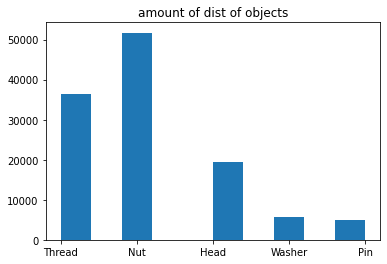

In [ ]:
print(df['region'].value_counts())
plt.hist(df['region'])
plt.title('amount of dist of objects')
plt.show()

In [ ]:
df[df['region']=='Thread']

,filename,size,region,x_min,x_max,y_min,y_max
0,img_315_1_0.jpg,73811,Thread,834.0,848.0,526.0,539.0
2,img_315_1_0.jpg,73811,Thread,819.0,834.0,580.0,593.0
4,img_315_1_0.jpg,73811,Thread,875.0,889.0,588.0,600.0
6,img_315_1_0.jpg,73811,Thread,907.0,921.0,598.0,610.0
2,img_315_1_1.jpg,74478,Thread,846.0,861.0,603.0,619.0
...,...,...,...,...,...,...,...
4,img_324_3_0.jpg,79366,Thread,488.0,511.0,829.0,855.0
9,img_324_3_0.jpg,79366,Thread,245.0,270.0,840.0,854.0
0,img_324_3_1.jpg,54131,Thread,538.0,566.0,68.0,93.0
4,img_324_3_1.jpg,54131,Thread,488.0,511.0,29.0,55.0


##no. of objects in img

In [ ]:
object_count=pd.DataFrame(index=df['filename'].unique(),data=df['filename'].value_counts())
object_count.shape

(8041, 1)

In [ ]:
object_count=object_count.rename(columns={'filename':'obj_count'})
object_count

,obj_count
img_315_1_0.jpg,8
img_315_1_1.jpg,12
img_315_2_0.jpg,24
img_315_2_1.jpg,49
img_315_3_0.jpg,24
...,...
img_324_2_0.jpg,42
img_324_2_1.jpg,55
img_324_2_2.jpg,6
img_324_3_0.jpg,12


In [ ]:
object_count.loc['img_6_1_1.jpg',:]

obj_count    23
Name: img_6_1_1.jpg, dtype: int64

#images

(1000, 1000, 3)


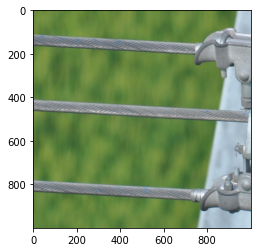

In [ ]:
img1=plt.imread('/content/drive/MyDrive/Object_Detection/Images/img_6_1_1.jpg')
print(img1.shape)
plt.imshow(img1)
plt.show()

In [ ]:
df[df['filename']=='img_6_1_1.jpg']

,filename,size,region,x_min,x_max,y_min,y_max
0,img_6_1_1.jpg,72013,Pin,950.0,989.0,450.0,467.0
1,img_6_1_1.jpg,72013,Washer,873.0,922.0,814.0,835.0
2,img_6_1_1.jpg,72013,Nut,874.0,919.0,793.0,828.0
3,img_6_1_1.jpg,72013,Thread,882.0,911.0,766.0,805.0
4,img_6_1_1.jpg,72013,Washer,912.0,939.0,774.0,793.0
5,img_6_1_1.jpg,72013,Nut,913.0,955.0,746.0,786.0
6,img_6_1_1.jpg,72013,Thread,918.0,949.0,715.0,758.0
7,img_6_1_1.jpg,72013,Pin,928.0,953.0,647.0,674.0
8,img_6_1_1.jpg,72013,Pin,931.0,947.0,611.0,623.0
9,img_6_1_1.jpg,72013,Thread,925.0,946.0,623.0,647.0


In [ ]:
df[df['filename']=='img_6_1_1.jpg']['region'].value_counts()

Thread    8
Nut       6
Pin       5
Washer    4
Name: region, dtype: int64

##opening all imgs from folder

In [ ]:
import glob
images=[plt.imread(file) for file in glob.glob('/content/drive/MyDrive/Object_Detection/demo/*.jpg')]

In [ ]:
for img in images:
  if img.shape!=(1000,1000,3):
    print(img.shape)
print('all shape 1000,1000,3')

all shape 1000,1000,3


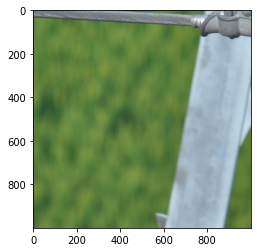

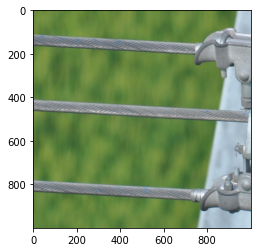

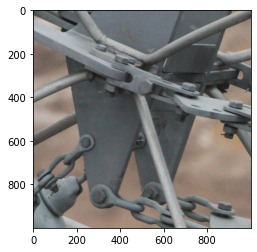

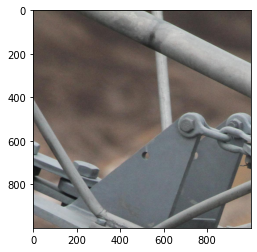

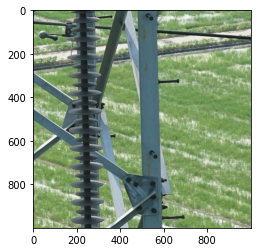

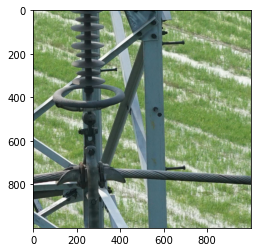

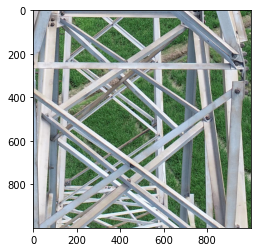

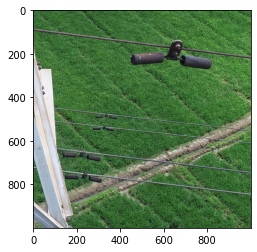

In [ ]:
for img in images:
  plt.imshow(img)
  plt.show()

##visualizing the bounding boxes

In [ ]:
def bbox(im,xmin,xmax,ymin,ymax):
    imgcv = im
    min=(xmin, ymin)
    max=(xmax, ymax)
    cv2.rectangle(imgcv, min, max, (255,0,0), 4)
    return imgcv

In [ ]:
da=df[df['filename']=='img_19_2_0.jpg']
da

,filename,size,region,x_min,x_max,y_min,y_max
0,img_19_2_0.jpg,102280,Nut,904.0,959.0,496.0,551.0
1,img_19_2_0.jpg,102280,Head,674.0,744.0,491.0,561.0
2,img_19_2_0.jpg,102280,Head,286.0,335.0,954.0,986.0
3,img_19_2_0.jpg,102280,Head,180.0,305.0,690.0,770.0


Bounding box for NUT


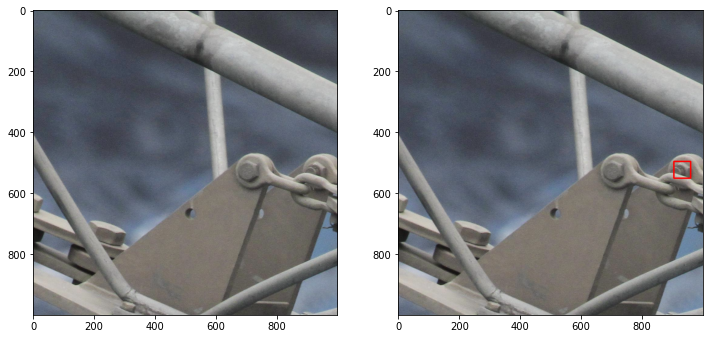

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Object_Detection/demo/Copy of img_19_2_0.jpg')
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(bbox(image,da[da['region']=='Nut']['x_min'],da[da['region']=='Nut']['x_max'],
                da[da['region']=='Nut']['y_min'],da[da['region']=='Nut']['y_max']))
print('Bounding box for NUT')